<a href="https://colab.research.google.com/github/kairamilanifitria/NLP-Projects/blob/main/Project%202%20Text%20Summarization/1_Preprocessing_Dev%2BTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [5]:
# Load the dataset
dev_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/normalized_dataset/dev_normalized.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/normalized_dataset/test_normalized.csv')


# Dev + Test Set

In [7]:
dev_df.iloc[1]

,1
id,10628
url,https://www.liputan6.com/news/read/10628/pengungsi-madura-masih-mengaliri-surabaya
clean_article,"[['Liputan6', '.', 'com', ',', 'Surabaya', ':', 'Tokoh', 'Madura', 'dan', 'Kalimantan', 'telah', 'bersepakat', 'untuk', 'berdamai', '.'], ['Tapi', ',', 'arus', 'pengungsi', 'dari', 'Bumi', 'Borneo', 'terus', 'mengaliri', 'Tanah', 'Jawa', '.'], ['Hingga', 'kini', ',', 'ada', 'sekitar', '90', 'ribu', 'pengungsi', 'masuk', 'ke', 'Jawa', 'Timur', '.'], ['Karena', 'itu', ',', 'Gubernur', 'Jatim', 'Imam', 'Utomo', 'meminta', 'gubernur', 'se-Kalimantan', 'mensosialisasikan', 'kesepakatan', 'damai', 'di', 'Jakarta', 'dengan', 'para', 'tokoh', 'masyarakat', 'dan', 'tetua', 'adat', 'di', 'Kalimantan', '.'], ['Pernyataan', 'itu', 'diungkapkan', 'Imam', 'di', 'Surabaya', ',', 'baru-baru', 'ini', '.'], ['Imam', 'mengaku', 'cemas', 'melihat', 'gelombang', 'pengungsi', 'yang', 'tak', 'pernah', 'surut', '.'], ['Sebab', ',', 'konflik', 'masih', 'terus', 'menyeruak', 'di', 'sejumlah', 'daerah', 'di', 'Kalimantan', 'Tengah', 'dan', 'Kalimantan', 'Selatan', '.'], ['Akibatnya', ',', 'pengungsi', 'yang', 'berjumlah', '70', '.', '000', 'bertambah', '20', '.', '000', 'orang', '.'], ['Padahal', ',', 'dana', 'yang', 'ada', 'di', 'kas', 'Pemerintah', 'Daerah', 'Jatim', 'terbatas', '.'], ['Karena', 'itu', ',', 'Imam', 'meminta', 'para', 'gubernur', 'di', 'Kalimantan', 'mengerem', 'arus', 'pengungsi', '.'], ['Caranya', 'dengan', 'menciptakan', 'rasa', 'aman', 'buat', 'warga', 'Madura', 'yang', 'ada', 'di', 'Kalimantan', '.'], ['Imam', 'juga', 'meminta', 'gubenur', 'Kalimantan', 'memberi', 'tempat', 'perlindungan', 'yang', 'aman', 'bagi', 'pengungsi', 'Madura', '.'], ['Sebab', ',', 'saat', 'ini', ',', 'Pemda', 'Jatim', 'tengah', 'menata', 'kehidupan', 'pengungsi', 'gelombang', 'pertama', '.'], ['Dia', 'khawatir', ',', 'jumlah', 'yang', 'membludak', 'akan', 'memperburuk', 'situasi', 'pengungsi', 'di', 'Jatim', '.', '(', 'TNA/Hasan', 'Sentot', 'dan', 'Joko', 'Sulistiobudi', ')', '.']]"
clean_summary,"[['Gubernur', 'Jawa', 'Timur', 'meminta', 'para', 'gubernur', 'se-Kalimantan', 'mensosialisasikan', 'kesepakatan', 'damai', 'kepada', 'warganya', '.'], ['Dengan', 'begitu', 'tak', 'ada', 'lagi', 'gelombang', 'pengungsi', 'warga', 'Madura', 'ke', 'Jatim', '.']]"
extractive_summary,"[2, 3]"
rebuilt_extractive_summary,"[['Hingga', 'kini', ',', 'ada', 'sekitar', '90', 'ribu', 'pengungsi', 'masuk', 'ke', 'Jawa', 'Timur', '.'], ['Karena', 'itu', ',', 'Gubernur', 'Jatim', 'Imam', 'Utomo', 'meminta', 'gubernur', 'se-Kalimantan', 'mensosialisasikan', 'kesepakatan', 'damai', 'di', 'Jakarta', 'dengan', 'para', 'tokoh', 'masyarakat', 'dan', 'tetua', 'adat', 'di', 'Kalimantan', '.']]"
text,liputan6 com surabaya tokoh madura dan kalimantan telah sepakat untuk damai tapi arus ungsi dari bumi borneo terus alir tanah jawa hingga kini ada sekitar 90 ribu ungsi masuk ke jawa timur karena itu gubernur jatim imam utomo minta gubernur se-kalimantan sosialisasi sepakat damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan nyata itu ungkap imam di surabaya baru ini imam aku cemas lihat gelombang ungsi yang tak pernah surut sebab konflik masih terus seruak di jumlah daerah di kalimantan tengah dan kalimantan selatan akibat ungsi yang jumlah 70 000 tambah 20 000 orang padahal dana yang ada di kas perintah daerah jatim batas karena itu imam minta para gubernur di kalimantan rem arus ungsi cara dengan cipta rasa aman buat warga madura yang ada di kalimantan imam juga minta gubenur kalimantan beri tempat lindung yang aman bagi ungsi madura sebab saat ini pemda jatim tengah tata hidup ungsi gelombang pertama dia khawatir jumlah yang membludak akan buruk situasi ungsi di jatim tna hasan sentot dan joko sulistiobudi
summary,gubernur jawa timur minta para gubernur se-kalimantan sosialisasi sepakat damai kepada warga dengan begitu tak ada lagi gelombang ungsi warga madura ke jatim
e_summary,hingga kini ada sekitar 90 ribu ungsi masuk ke jawa timur karena itu gube

In [9]:
import re

def clean_text(text):
    # Remove URL + lowercase
    text = re.sub(r'#(\w+)', lambda match: ' ' + re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', match.group(1)), text)
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the function to create new columns
dev_df['clean1_article'] = dev_df['clean_article'].apply(clean_text)
dev_df['clean1_summary'] = dev_df['clean_summary'].apply(clean_text)
dev_df['extractive1_summary'] = dev_df['rebuilt_extractive_summary'].apply(clean_text)

test_df['clean1_article'] = test_df['clean_article'].apply(clean_text)
test_df['clean1_summary'] = test_df['clean_summary'].apply(clean_text)
test_df['extractive1_summary'] = test_df['rebuilt_extractive_summary'].apply(clean_text)


In [10]:
dev_df.iloc[1]

,1
id,10628
url,https://www.liputan6.com/news/read/10628/pengungsi-madura-masih-mengaliri-surabaya
clean_article,"[['Liputan6', '.', 'com', ',', 'Surabaya', ':', 'Tokoh', 'Madura', 'dan', 'Kalimantan', 'telah', 'bersepakat', 'untuk', 'berdamai', '.'], ['Tapi', ',', 'arus', 'pengungsi', 'dari', 'Bumi', 'Borneo', 'terus', 'mengaliri', 'Tanah', 'Jawa', '.'], ['Hingga', 'kini', ',', 'ada', 'sekitar', '90', 'ribu', 'pengungsi', 'masuk', 'ke', 'Jawa', 'Timur', '.'], ['Karena', 'itu', ',', 'Gubernur', 'Jatim', 'Imam', 'Utomo', 'meminta', 'gubernur', 'se-Kalimantan', 'mensosialisasikan', 'kesepakatan', 'damai', 'di', 'Jakarta', 'dengan', 'para', 'tokoh', 'masyarakat', 'dan', 'tetua', 'adat', 'di', 'Kalimantan', '.'], ['Pernyataan', 'itu', 'diungkapkan', 'Imam', 'di', 'Surabaya', ',', 'baru-baru', 'ini', '.'], ['Imam', 'mengaku', 'cemas', 'melihat', 'gelombang', 'pengungsi', 'yang', 'tak', 'pernah', 'surut', '.'], ['Sebab', ',', 'konflik', 'masih', 'terus', 'menyeruak', 'di', 'sejumlah', 'daerah', 'di', 'Kalimantan', 'Tengah', 'dan', 'Kalimantan', 'Selatan', '.'], ['Akibatnya', ',', 'pengungsi', 'yang', 'berjumlah', '70', '.', '000', 'bertambah', '20', '.', '000', 'orang', '.'], ['Padahal', ',', 'dana', 'yang', 'ada', 'di', 'kas', 'Pemerintah', 'Daerah', 'Jatim', 'terbatas', '.'], ['Karena', 'itu', ',', 'Imam', 'meminta', 'para', 'gubernur', 'di', 'Kalimantan', 'mengerem', 'arus', 'pengungsi', '.'], ['Caranya', 'dengan', 'menciptakan', 'rasa', 'aman', 'buat', 'warga', 'Madura', 'yang', 'ada', 'di', 'Kalimantan', '.'], ['Imam', 'juga', 'meminta', 'gubenur', 'Kalimantan', 'memberi', 'tempat', 'perlindungan', 'yang', 'aman', 'bagi', 'pengungsi', 'Madura', '.'], ['Sebab', ',', 'saat', 'ini', ',', 'Pemda', 'Jatim', 'tengah', 'menata', 'kehidupan', 'pengungsi', 'gelombang', 'pertama', '.'], ['Dia', 'khawatir', ',', 'jumlah', 'yang', 'membludak', 'akan', 'memperburuk', 'situasi', 'pengungsi', 'di', 'Jatim', '.', '(', 'TNA/Hasan', 'Sentot', 'dan', 'Joko', 'Sulistiobudi', ')', '.']]"
clean_summary,"[['Gubernur', 'Jawa', 'Timur', 'meminta', 'para', 'gubernur', 'se-Kalimantan', 'mensosialisasikan', 'kesepakatan', 'damai', 'kepada', 'warganya', '.'], ['Dengan', 'begitu', 'tak', 'ada', 'lagi', 'gelombang', 'pengungsi', 'warga', 'Madura', 'ke', 'Jatim', '.']]"
extractive_summary,"[2, 3]"
rebuilt_extractive_summary,"[['Hingga', 'kini', ',', 'ada', 'sekitar', '90', 'ribu', 'pengungsi', 'masuk', 'ke', 'Jawa', 'Timur', '.'], ['Karena', 'itu', ',', 'Gubernur', 'Jatim', 'Imam', 'Utomo', 'meminta', 'gubernur', 'se-Kalimantan', 'mensosialisasikan', 'kesepakatan', 'damai', 'di', 'Jakarta', 'dengan', 'para', 'tokoh', 'masyarakat', 'dan', 'tetua', 'adat', 'di', 'Kalimantan', '.']]"
text,liputan6 com surabaya tokoh madura dan kalimantan telah sepakat untuk damai tapi arus ungsi dari bumi borneo terus alir tanah jawa hingga kini ada sekitar 90 ribu ungsi masuk ke jawa timur karena itu gubernur jatim imam utomo minta gubernur se-kalimantan sosialisasi sepakat damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan nyata itu ungkap imam di surabaya baru ini imam aku cemas lihat gelombang ungsi yang tak pernah surut sebab konflik masih terus seruak di jumlah daerah di kalimantan tengah dan kalimantan selatan akibat ungsi yang jumlah 70 000 tambah 20 000 orang padahal dana yang ada di kas perintah daerah jatim batas karena itu imam minta para gubernur di kalimantan rem arus ungsi cara dengan cipta rasa aman buat warga madura yang ada di kalimantan imam juga minta gubenur kalimantan beri tempat lindung yang aman bagi ungsi madura sebab saat ini pemda jatim tengah tata hidup ungsi gelombang pertama dia khawatir jumlah yang membludak akan buruk situasi ungsi di jatim tna hasan sentot dan joko sulistiobudi
summary,gubernur jawa timur minta para gubernur se-kalimantan sosialisasi sepakat damai kepada warga dengan begitu tak ada lagi gelombang ungsi warga madura ke jatim
e_summary,hingga kini ada sekitar 90 ribu ungsi masuk ke jawa timur karena itu gube

In [11]:
test_df.iloc[1]

,1
id,22708
url,https://www.liputan6.com/news/read/22708/kereta-api-jalur-selatan-mengalami-keterlambatan
clean_article,"[['Liputan6', '.', 'com', ',', 'Yogyakarta', ':', 'Kedatangan', 'kereta', 'api', 'dari', 'jalur', 'selatan', ',', 'Senin', '(', '29/10', ')', ',', 'dipastikan', 'terlambat', 'tiba', 'di', 'Stasiun', 'Bandung', ',', 'Jawa', 'Barat', '.'], ['Hal', 'itu', 'terjadi', 'menyusul', 'amblasnya', 'lintasan', 'kereta', 'di', 'Kroya', ',', 'Jawa', 'Tengah', ',', 'Kamis', 'silam', '[', 'baca', ':', 'Lintasan', 'KA', 'Antara', 'Kroya', 'dan', 'Bandung', 'Ambles', ']', '.'], ['Rangkaian', 'kereta', 'api', 'yang', 'dipastikan', 'terlambat', 'adalah', 'Taksaka', ',', 'Argowilis', ',', 'Lodaya', ',', 'Mutiara', 'Selatan', ',', 'Turangga', ',', 'Cisadane', ',', 'dan', 'Kahuripan', '.'], ['Demikian', 'diungkapkan', 'seorang', 'petugas', 'PT', 'Kereta', 'Api', 'Indonesia', 'Daerah', 'Operasi', 'VI', 'di', 'Stasiun', 'Tugu', ',', 'Yogyakarta', '.'], ['Petugas', 'itu', 'menjelaskan', ',', 'kereta', 'yang', 'berjalan', 'di', 'atas', 'lintasan', 'Kroya', 'mesti', 'ekstra', 'hati-hati', 'karena', 'tengah', 'diperbaiki', 'petugas', '.'], ['Apalagi', ',', 'hujan', 'lebat', 'yang', 'terus', 'mengguyur', 'wilayah', 'Cilacap', 'juga', 'ikut', 'memperparah', 'kondisi', 'lintasan', '.'], ['Karena', 'itulah', ',', 'Daops', 'VI', 'memberlakukan', 'sistem', 'susul', 'guna', 'mengantisipasi', 'terjadinya', 'tumpang', 'tindih', 'jadwal', 'keberangkatan', '.'], ['Jelasnya', ',', 'kereta', 'yang', 'jadwalnya', 'tepat', 'waktu', 'diberangkatkan', 'terlebih', 'dahulu', 'dibanding', 'kereta', 'yang', 'telanjur', 'molor', '.'], ['Berdasarkan', 'pemantauan', 'SCTV', ',', 'penerapan', 'sistem', 'tersebut', 'mengakibatkan', 'ribuan', 'penumpang', 'menumpuk', 'di', 'Stasiun', 'Tugu', 'dan', 'Lempuyangan', ',', 'Yogyakarta', '.'], ['Sementara', 'jadwal', 'KA', 'jalur', 'selatan', 'pada', 'akhir', 'pekan', 'ini', 'terbilang', 'padat', ',', 'soalnya', 'bertepatan', 'dengan', 'puncak', 'arus', 'balik', 'pelajar', 'sehabis', 'liburan', 'semester', '.', '(', 'KEN/Wiwik', 'Susilo', ')', '.']]"
clean_summary,"[['Pemberangkatan', 'kereta', 'api', 'dari', 'jalur', 'selatan', 'kembali', 'mengalami', 'keterlambatan', '.'], ['Lintasan', 'di', 'Kroya', ',', 'Jawa', 'Tengah', ',', 'masih', 'diperbaiki', 'petugas', 'PT', 'Kereta', 'Api', 'Indonesia', '.']]"
extractive_summary,"[3, 4]"
rebuilt_extractive_summary,"[['Demikian', 'diungkapkan', 'seorang', 'petugas', 'PT', 'Kereta', 'Api', 'Indonesia', 'Daerah', 'Operasi', 'VI', 'di', 'Stasiun', 'Tugu', ',', 'Yogyakarta', '.'], ['Petugas', 'itu', 'menjelaskan', ',', 'kereta', 'yang', 'berjalan', 'di', 'atas', 'lintasan', 'Kroya', 'mesti', 'ekstra', 'hati-hati', 'karena', 'tengah', 'diperbaiki', 'petugas', '.']]"
text,liputan6 com yogyakarta datang kereta api dari jalur selatan senin 29 10 pasti lambat tiba di stasiun bandung jawa barat hal itu jadi susul amblas lintas kereta di kroya jawa tengah kamis silam baca lintas ka antara kroya dan bandung ambles rangkai kereta api yang pasti lambat adalah taksaka argowilis lodaya mutiara selatan turangga cisadane dan kahuripan demikian ungkap orang tugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta tugas itu jelas kereta yang jalan di atas lintas kroya mesti ekstra hati karena tengah baik tugas apalagi hujan lebat yang terus guyur wilayah cilacap juga ikut parah kondisi lintas karena itu daops vi laku sistem susul guna antisipasi jadi tumpang tindih jadwal berangkat jelas kereta yang jadwal tepat waktu berangkat lebih dahulu banding kereta yang telanjur molor dasar pantau sctv terap sistem sebut akibat ribu tumpang tumpuk di stasiun tugu dan lempuyangan yogyakarta sementara jadwal ka jalur selatan pada akhir pekan ini bilang padat soal tepat dengan puncak arus balik ajar habis libur semester ken wiwik susilo
summary,berangkat kereta api dari jalur selatan kembali alam lambat lintas di kroya jawa tengah masih baik tugas pt kereta api indonesia
e_summary,demikia

In [12]:
# prompt: make a new df that contains only column id, url, clean1_article, clean1_summary, and extractive1_summary for those two dataset

new_dev_df = dev_df[['id', 'url', 'clean1_article', 'clean1_summary', 'extractive1_summary']].copy()
new_test_df = test_df[['id', 'url', 'clean1_article', 'clean1_summary', 'extractive1_summary']].copy()


In [13]:
new_dev_df.iloc[1]

,1
id,10628
url,https://www.liputan6.com/news/read/10628/pengungsi-madura-masih-mengaliri-surabaya
clean1_article,liputan6 com surabaya tokoh madura dan kalimantan telah bersepakat untuk berdamai tapi arus pengungsi dari bumi borneo terus mengaliri tanah jawa hingga kini ada sekitar 90 ribu pengungsi masuk ke jawa timur karena itu gubernur jatim imam utomo meminta gubernur se kalimantan mensosialisasikan kesepakatan damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan pernyataan itu diungkapkan imam di surabaya baru baru ini imam mengaku cemas melihat gelombang pengungsi yang tak pernah surut sebab konflik masih terus menyeruak di sejumlah daerah di kalimantan tengah dan kalimantan selatan akibatnya pengungsi yang berjumlah 70 000 bertambah 20 000 orang padahal dana yang ada di kas pemerintah daerah jatim terbatas karena itu imam meminta para gubernur di kalimantan mengerem arus pengungsi caranya dengan menciptakan rasa aman buat warga madura yang ada di kalimantan imam juga meminta gubenur kalimantan memberi tempat perlindungan yang aman bagi pengungsi madura sebab saat ini pemda jatim tengah menata kehidupan pengungsi gelombang pertama dia khawatir jumlah yang membludak akan memperburuk situasi pengungsi di jatim tna hasan sentot dan joko sulistiobudi
clean1_summary,gubernur jawa timur meminta para gubernur se kalimantan mensosialisasikan kesepakatan damai kepada warganya dengan begitu tak ada lagi gelombang pengungsi warga madura ke jatim
extractive1_summary,hingga kini ada sekitar 90 ribu pengungsi masuk ke jawa timur karena itu gubernur jatim imam utomo meminta gubernur se kalimantan mensosialisasikan kesepakatan damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan


In [14]:
new_test_df .iloc[1]

,1
id,22708
url,https://www.liputan6.com/news/read/22708/kereta-api-jalur-selatan-mengalami-keterlambatan
clean1_article,liputan6 com yogyakarta kedatangan kereta api dari jalur selatan senin 29 10 dipastikan terlambat tiba di stasiun bandung jawa barat hal itu terjadi menyusul amblasnya lintasan kereta di kroya jawa tengah kamis silam baca lintasan ka antara kroya dan bandung ambles rangkaian kereta api yang dipastikan terlambat adalah taksaka argowilis lodaya mutiara selatan turangga cisadane dan kahuripan demikian diungkapkan seorang petugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta petugas itu menjelaskan kereta yang berjalan di atas lintasan kroya mesti ekstra hati hati karena tengah diperbaiki petugas apalagi hujan lebat yang terus mengguyur wilayah cilacap juga ikut memperparah kondisi lintasan karena itulah daops vi memberlakukan sistem susul guna mengantisipasi terjadinya tumpang tindih jadwal keberangkatan jelasnya kereta yang jadwalnya tepat waktu diberangkatkan terlebih dahulu dibanding kereta yang telanjur molor berdasarkan pemantauan sctv penerapan sistem tersebut mengakibatkan ribuan penumpang menumpuk di stasiun tugu dan lempuyangan yogyakarta sementara jadwal ka jalur selatan pada akhir pekan ini terbilang padat soalnya bertepatan dengan puncak arus balik pelajar sehabis liburan semester ken wiwik susilo
clean1_summary,pemberangkatan kereta api dari jalur selatan kembali mengalami keterlambatan lintasan di kroya jawa tengah masih diperbaiki petugas pt kereta api indonesia
extractive1_summary,demikian diungkapkan seorang petugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta petugas itu menjelaskan kereta yang berjalan di atas lintasan kroya mesti ekstra hati hati karena tengah diperbaiki petugas


In [15]:
# prompt: rename the column clean1_article into "text", clean1_summary into "abstractive_summary", and extractive1_summary into " extactive_summary" for those two dataset

new_dev_df = new_dev_df.rename(columns={'clean1_article': 'text', 'clean1_summary': 'abstractive_summary', 'extractive1_summary': 'extractive_summary'})
new_test_df = new_test_df.rename(columns={'clean1_article': 'text', 'clean1_summary': 'abstractive_summary', 'extractive1_summary': 'extractive_summary'})


In [16]:
new_dev_df.iloc[1]

,1
id,10628
url,https://www.liputan6.com/news/read/10628/pengungsi-madura-masih-mengaliri-surabaya
text,liputan6 com surabaya tokoh madura dan kalimantan telah bersepakat untuk berdamai tapi arus pengungsi dari bumi borneo terus mengaliri tanah jawa hingga kini ada sekitar 90 ribu pengungsi masuk ke jawa timur karena itu gubernur jatim imam utomo meminta gubernur se kalimantan mensosialisasikan kesepakatan damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan pernyataan itu diungkapkan imam di surabaya baru baru ini imam mengaku cemas melihat gelombang pengungsi yang tak pernah surut sebab konflik masih terus menyeruak di sejumlah daerah di kalimantan tengah dan kalimantan selatan akibatnya pengungsi yang berjumlah 70 000 bertambah 20 000 orang padahal dana yang ada di kas pemerintah daerah jatim terbatas karena itu imam meminta para gubernur di kalimantan mengerem arus pengungsi caranya dengan menciptakan rasa aman buat warga madura yang ada di kalimantan imam juga meminta gubenur kalimantan memberi tempat perlindungan yang aman bagi pengungsi madura sebab saat ini pemda jatim tengah menata kehidupan pengungsi gelombang pertama dia khawatir jumlah yang membludak akan memperburuk situasi pengungsi di jatim tna hasan sentot dan joko sulistiobudi
abstractive_summary,gubernur jawa timur meminta para gubernur se kalimantan mensosialisasikan kesepakatan damai kepada warganya dengan begitu tak ada lagi gelombang pengungsi warga madura ke jatim
extractive_summary,hingga kini ada sekitar 90 ribu pengungsi masuk ke jawa timur karena itu gubernur jatim imam utomo meminta gubernur se kalimantan mensosialisasikan kesepakatan damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan


In [17]:
new_test_df.iloc[1]

,1
id,22708
url,https://www.liputan6.com/news/read/22708/kereta-api-jalur-selatan-mengalami-keterlambatan
text,liputan6 com yogyakarta kedatangan kereta api dari jalur selatan senin 29 10 dipastikan terlambat tiba di stasiun bandung jawa barat hal itu terjadi menyusul amblasnya lintasan kereta di kroya jawa tengah kamis silam baca lintasan ka antara kroya dan bandung ambles rangkaian kereta api yang dipastikan terlambat adalah taksaka argowilis lodaya mutiara selatan turangga cisadane dan kahuripan demikian diungkapkan seorang petugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta petugas itu menjelaskan kereta yang berjalan di atas lintasan kroya mesti ekstra hati hati karena tengah diperbaiki petugas apalagi hujan lebat yang terus mengguyur wilayah cilacap juga ikut memperparah kondisi lintasan karena itulah daops vi memberlakukan sistem susul guna mengantisipasi terjadinya tumpang tindih jadwal keberangkatan jelasnya kereta yang jadwalnya tepat waktu diberangkatkan terlebih dahulu dibanding kereta yang telanjur molor berdasarkan pemantauan sctv penerapan sistem tersebut mengakibatkan ribuan penumpang menumpuk di stasiun tugu dan lempuyangan yogyakarta sementara jadwal ka jalur selatan pada akhir pekan ini terbilang padat soalnya bertepatan dengan puncak arus balik pelajar sehabis liburan semester ken wiwik susilo
abstractive_summary,pemberangkatan kereta api dari jalur selatan kembali mengalami keterlambatan lintasan di kroya jawa tengah masih diperbaiki petugas pt kereta api indonesia
extractive_summary,demikian diungkapkan seorang petugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta petugas itu menjelaskan kereta yang berjalan di atas lintasan kroya mesti ekstra hati hati karena tengah diperbaiki petugas


In [20]:
dev_df = new_dev_df
dev_df.iloc[1]

,1
id,10628
url,https://www.liputan6.com/news/read/10628/pengungsi-madura-masih-mengaliri-surabaya
text,liputan6 com surabaya tokoh madura dan kalimantan telah bersepakat untuk berdamai tapi arus pengungsi dari bumi borneo terus mengaliri tanah jawa hingga kini ada sekitar 90 ribu pengungsi masuk ke jawa timur karena itu gubernur jatim imam utomo meminta gubernur se kalimantan mensosialisasikan kesepakatan damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan pernyataan itu diungkapkan imam di surabaya baru baru ini imam mengaku cemas melihat gelombang pengungsi yang tak pernah surut sebab konflik masih terus menyeruak di sejumlah daerah di kalimantan tengah dan kalimantan selatan akibatnya pengungsi yang berjumlah 70 000 bertambah 20 000 orang padahal dana yang ada di kas pemerintah daerah jatim terbatas karena itu imam meminta para gubernur di kalimantan mengerem arus pengungsi caranya dengan menciptakan rasa aman buat warga madura yang ada di kalimantan imam juga meminta gubenur kalimantan memberi tempat perlindungan yang aman bagi pengungsi madura sebab saat ini pemda jatim tengah menata kehidupan pengungsi gelombang pertama dia khawatir jumlah yang membludak akan memperburuk situasi pengungsi di jatim tna hasan sentot dan joko sulistiobudi
abstractive_summary,gubernur jawa timur meminta para gubernur se kalimantan mensosialisasikan kesepakatan damai kepada warganya dengan begitu tak ada lagi gelombang pengungsi warga madura ke jatim
extractive_summary,hingga kini ada sekitar 90 ribu pengungsi masuk ke jawa timur karena itu gubernur jatim imam utomo meminta gubernur se kalimantan mensosialisasikan kesepakatan damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan


In [21]:
test_df = new_test_df
test_df.iloc[1]

,1
id,22708
url,https://www.liputan6.com/news/read/22708/kereta-api-jalur-selatan-mengalami-keterlambatan
text,liputan6 com yogyakarta kedatangan kereta api dari jalur selatan senin 29 10 dipastikan terlambat tiba di stasiun bandung jawa barat hal itu terjadi menyusul amblasnya lintasan kereta di kroya jawa tengah kamis silam baca lintasan ka antara kroya dan bandung ambles rangkaian kereta api yang dipastikan terlambat adalah taksaka argowilis lodaya mutiara selatan turangga cisadane dan kahuripan demikian diungkapkan seorang petugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta petugas itu menjelaskan kereta yang berjalan di atas lintasan kroya mesti ekstra hati hati karena tengah diperbaiki petugas apalagi hujan lebat yang terus mengguyur wilayah cilacap juga ikut memperparah kondisi lintasan karena itulah daops vi memberlakukan sistem susul guna mengantisipasi terjadinya tumpang tindih jadwal keberangkatan jelasnya kereta yang jadwalnya tepat waktu diberangkatkan terlebih dahulu dibanding kereta yang telanjur molor berdasarkan pemantauan sctv penerapan sistem tersebut mengakibatkan ribuan penumpang menumpuk di stasiun tugu dan lempuyangan yogyakarta sementara jadwal ka jalur selatan pada akhir pekan ini terbilang padat soalnya bertepatan dengan puncak arus balik pelajar sehabis liburan semester ken wiwik susilo
abstractive_summary,pemberangkatan kereta api dari jalur selatan kembali mengalami keterlambatan lintasan di kroya jawa tengah masih diperbaiki petugas pt kereta api indonesia
extractive_summary,demikian diungkapkan seorang petugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta petugas itu menjelaskan kereta yang berjalan di atas lintasan kroya mesti ekstra hati hati karena tengah diperbaiki petugas


# Lemmatize

In [23]:
!pip install nlp-id
from nlp_id.lemmatizer import Lemmatizer
from nltk.tokenize import word_tokenize

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 58.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=4daf39751a16e354264a6dd3ed3ea3d181a30ce94006ee61dece59b5c3cda338
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
  Attempting uninstall: huggingface-hub
    Found e

In [26]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [27]:
lemmatizer = Lemmatizer()

def lemmatize_text(text):
  tokens = word_tokenize(text)
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return " ".join(lemmatized_tokens)

test_df['text1'] = test_df['text'].apply(lemmatize_text)
test_df['abstractive_summary1'] = test_df['abstractive_summary'].apply(lemmatize_text)
test_df['extractive_summary1'] = test_df['extractive_summary'].apply(lemmatize_text)

dev_df['text1'] = dev_df['text'].apply(lemmatize_text)
dev_df['abstractive_summary1'] = dev_df['abstractive_summary'].apply(lemmatize_text)
dev_df['extractive_summary1'] = dev_df['extractive_summary'].apply(lemmatize_text)


In [29]:
dev_df.iloc[1]

,1
id,10628
url,https://www.liputan6.com/news/read/10628/pengungsi-madura-masih-mengaliri-surabaya
text,liputan6 com surabaya tokoh madura dan kalimantan telah bersepakat untuk berdamai tapi arus pengungsi dari bumi borneo terus mengaliri tanah jawa hingga kini ada sekitar 90 ribu pengungsi masuk ke jawa timur karena itu gubernur jatim imam utomo meminta gubernur se kalimantan mensosialisasikan kesepakatan damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan pernyataan itu diungkapkan imam di surabaya baru baru ini imam mengaku cemas melihat gelombang pengungsi yang tak pernah surut sebab konflik masih terus menyeruak di sejumlah daerah di kalimantan tengah dan kalimantan selatan akibatnya pengungsi yang berjumlah 70 000 bertambah 20 000 orang padahal dana yang ada di kas pemerintah daerah jatim terbatas karena itu imam meminta para gubernur di kalimantan mengerem arus pengungsi caranya dengan menciptakan rasa aman buat warga madura yang ada di kalimantan imam juga meminta gubenur kalimantan memberi tempat perlindungan yang aman bagi pengungsi madura sebab saat ini pemda jatim tengah menata kehidupan pengungsi gelombang pertama dia khawatir jumlah yang membludak akan memperburuk situasi pengungsi di jatim tna hasan sentot dan joko sulistiobudi
abstractive_summary,gubernur jawa timur meminta para gubernur se kalimantan mensosialisasikan kesepakatan damai kepada warganya dengan begitu tak ada lagi gelombang pengungsi warga madura ke jatim
extractive_summary,hingga kini ada sekitar 90 ribu pengungsi masuk ke jawa timur karena itu gubernur jatim imam utomo meminta gubernur se kalimantan mensosialisasikan kesepakatan damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan
text1,liputan6 com surabaya tokoh madura dan kalimantan telah sepakat untuk damai tapi arus ungsi dari bumi borneo terus alir tanah jawa hingga kini ada sekitar 90 ribu ungsi masuk ke jawa timur karena itu gubernur jatim imam utomo minta gubernur se kalimantan sosialisasi sepakat damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan nyata itu ungkap imam di surabaya baru baru ini imam aku cemas lihat gelombang ungsi yang tak pernah surut sebab konflik masih terus seruak di jumlah daerah di kalimantan tengah dan kalimantan selatan akibat ungsi yang jumlah 70 000 tambah 20 000 orang padahal dana yang ada di kas perintah daerah jatim batas karena itu imam minta para gubernur di kalimantan rem arus ungsi cara dengan cipta rasa aman buat warga madura yang ada di kalimantan imam juga minta gubenur kalimantan beri tempat lindung yang aman bagi ungsi madura sebab saat ini pemda jatim tengah tata hidup ungsi gelombang pertama dia khawatir jumlah yang membludak akan buruk situasi ungsi di jatim tna hasan sentot dan joko sulistiobudi
abstractive_summary1,gubernur jawa timur minta para gubernur se kalimantan sosialisasi sepakat damai kepada warga dengan begitu tak ada lagi gelombang ungsi warga madura ke jatim
extractive_summary1,hingga kini ada sekitar 90 ribu ungsi masuk ke jawa timur karena itu gubernur jatim imam utomo minta gubernur se kalimantan sosialisasi sepakat damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan


In [28]:
test_df.iloc[1]

,1
id,22708
url,https://www.liputan6.com/news/read/22708/kereta-api-jalur-selatan-mengalami-keterlambatan
text,liputan6 com yogyakarta kedatangan kereta api dari jalur selatan senin 29 10 dipastikan terlambat tiba di stasiun bandung jawa barat hal itu terjadi menyusul amblasnya lintasan kereta di kroya jawa tengah kamis silam baca lintasan ka antara kroya dan bandung ambles rangkaian kereta api yang dipastikan terlambat adalah taksaka argowilis lodaya mutiara selatan turangga cisadane dan kahuripan demikian diungkapkan seorang petugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta petugas itu menjelaskan kereta yang berjalan di atas lintasan kroya mesti ekstra hati hati karena tengah diperbaiki petugas apalagi hujan lebat yang terus mengguyur wilayah cilacap juga ikut memperparah kondisi lintasan karena itulah daops vi memberlakukan sistem susul guna mengantisipasi terjadinya tumpang tindih jadwal keberangkatan jelasnya kereta yang jadwalnya tepat waktu diberangkatkan terlebih dahulu dibanding kereta yang telanjur molor berdasarkan pemantauan sctv penerapan sistem tersebut mengakibatkan ribuan penumpang menumpuk di stasiun tugu dan lempuyangan yogyakarta sementara jadwal ka jalur selatan pada akhir pekan ini terbilang padat soalnya bertepatan dengan puncak arus balik pelajar sehabis liburan semester ken wiwik susilo
abstractive_summary,pemberangkatan kereta api dari jalur selatan kembali mengalami keterlambatan lintasan di kroya jawa tengah masih diperbaiki petugas pt kereta api indonesia
extractive_summary,demikian diungkapkan seorang petugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta petugas itu menjelaskan kereta yang berjalan di atas lintasan kroya mesti ekstra hati hati karena tengah diperbaiki petugas
text1,liputan6 com yogyakarta datang kereta api dari jalur selatan senin 29 10 pasti lambat tiba di stasiun bandung jawa barat hal itu jadi susul amblas lintas kereta di kroya jawa tengah kamis silam baca lintas ka antara kroya dan bandung ambles rangkai kereta api yang pasti lambat adalah taksaka argowilis lodaya mutiara selatan turangga cisadane dan kahuripan demikian ungkap orang tugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta tugas itu jelas kereta yang jalan di atas lintas kroya mesti ekstra hati hati karena tengah baik tugas apalagi hujan lebat yang terus guyur wilayah cilacap juga ikut parah kondisi lintas karena itu daops vi laku sistem susul guna antisipasi jadi tumpang tindih jadwal berangkat jelas kereta yang jadwal tepat waktu berangkat lebih dahulu banding kereta yang telanjur molor dasar pantau sctv terap sistem sebut akibat ribu tumpang tumpuk di stasiun tugu dan lempuyangan yogyakarta sementara jadwal ka jalur selatan pada akhir pekan ini bilang padat soal tepat dengan puncak arus balik ajar habis libur semester ken wiwik susilo
abstractive_summary1,berangkat kereta api dari jalur selatan kembali alam lambat lintas di kroya jawa tengah masih baik tugas pt kereta api indonesia
extractive_summary1,demikian ungkap orang tugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta tugas itu jelas kereta yang jalan di atas lintas kroya mesti ekstra hati hati karena tengah baik tugas


In [32]:
dev_df['text'] = dev_df['text1']
dev_df['abstractive_summary'] = dev_df['abstractive_summary1']
dev_df['extractive_summary'] = dev_df['extractive_summary1']

test_df['text'] = test_df['text1']
test_df['abstractive_summary'] = test_df['abstractive_summary1']
test_df['extractive_summary'] = test_df['extractive_summary1']


In [36]:
dev_df.iloc[1]

,1
id,10628
url,https://www.liputan6.com/news/read/10628/pengungsi-madura-masih-mengaliri-surabaya
text,liputan6 com surabaya tokoh madura dan kalimantan telah sepakat untuk damai tapi arus ungsi dari bumi borneo terus alir tanah jawa hingga kini ada sekitar 90 ribu ungsi masuk ke jawa timur karena itu gubernur jatim imam utomo minta gubernur se kalimantan sosialisasi sepakat damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan nyata itu ungkap imam di surabaya baru baru ini imam aku cemas lihat gelombang ungsi yang tak pernah surut sebab konflik masih terus seruak di jumlah daerah di kalimantan tengah dan kalimantan selatan akibat ungsi yang jumlah 70 000 tambah 20 000 orang padahal dana yang ada di kas perintah daerah jatim batas karena itu imam minta para gubernur di kalimantan rem arus ungsi cara dengan cipta rasa aman buat warga madura yang ada di kalimantan imam juga minta gubenur kalimantan beri tempat lindung yang aman bagi ungsi madura sebab saat ini pemda jatim tengah tata hidup ungsi gelombang pertama dia khawatir jumlah yang membludak akan buruk situasi ungsi di jatim tna hasan sentot dan joko sulistiobudi
abstractive_summary,gubernur jawa timur minta para gubernur se kalimantan sosialisasi sepakat damai kepada warga dengan begitu tak ada lagi gelombang ungsi warga madura ke jatim
extractive_summary,hingga kini ada sekitar 90 ribu ungsi masuk ke jawa timur karena itu gubernur jatim imam utomo minta gubernur se kalimantan sosialisasi sepakat damai di jakarta dengan para tokoh masyarakat dan tetua adat di kalimantan


In [34]:
# prompt: drop the column text1, abstractive_summary1, extractive_summary1 in those two df/

dev_df = dev_df.drop(['text1', 'abstractive_summary1', 'extractive_summary1'], axis=1)
test_df = test_df.drop(['text1', 'abstractive_summary1', 'extractive_summary1'], axis=1)


In [37]:
dev_df.head(1)

,id,url,text,abstractive_summary,extractive_summary
0,10362,https://www.liputan6.com/news/read/10362/masyarakat-riau-membantah-pernyataan-gus-dur,liputan6 com jakarta jumlah tokoh masyarakat riau bantah nyata presiden abdurrahman wahid soal jumlah daerah masuk pulau riau yang akan pisah diri dari indonesia bahkan mereka malah tuntut gus dur mundur dari jabat atau paksa bila perlu mundur hal ini ungkap orang muka masyarakat riau abbas jamil ketika terima komisi ii dpr di gedung dpr mpr jakarta kamis 29 3 dalam nyata rombong masyarakat riau yang nama diri forum komunikasi muka masyarakat riau ingin gus dur mundur dari jabat sebab presiden nilai gagal jalan perintah turut abbas agar situasi ekonomi politik nasional dapat baik dpr harap dapat tampung dan realisasi aspirasi mereka sementara itu di riau dprd tempat belum tentu sikap tentang isu kepri yang ingin pisah diri dari provinsi riau turut ketua dprd riau chaoidir di pekanbaru riau jauh ini masih patok pada putus lama mereka yang tak terima minta kepri pisah diri isu bentuk provinsi kepri kembali edar susul nyata presiden wahid di tanjung pinang riau beberapa waktu silam saat itu gus dur nyata agar gubernur riau tak halang halang minta masyarakat kepri untuk pisah diri dari pekanbaru riau darat turut gus dur provinsi riau terlalu luas sehingga buka mungkin bentuk provinsi baru namun jumlah kalang dan tokoh masyarakat di riau tolak bentuk provinsi kepri dengan alas karakteristik budaya masih sama dan cenderung pecah masyarakat melayu ors tim liput 6 sctv,jumlah tokoh masyarakat riau bantah nyata presiden wahid kena pisah pulau riau dari indonesia malah balik mereka minta gus dur turun dari tampuk pimpin nasional,liputan6 com jakarta jumlah tokoh masyarakat riau bantah nyata presiden abdurrahman wahid bahkan mereka malah tuntut gus dur mundur dari jabat atau paksa bila perlu mundur


In [38]:
test_df.head(1)

,id,url,text,abstractive_summary,extractive_summary
0,22405,https://www.liputan6.com/news/read/22405/tommy-soeharto-resmi-dicekal,liputan6 com jakarta jaksa agung resmi cekal hutomo mandala putera alias tommy soeharto untuk pergi ke luar negeri cekal tommy alias ibrahim kali ini kait dengan milik senjata api amunisi dan bahan ledak di apartemen cemara dan rumah di jalan alam segar iii no 23 pondok indah demikian sampai kepala pusat terang dan hukum jagung moeljohardjo di jakarta baru baru ini moeljohardjo jelas cekal kepada tommy lama tahun itu laku sejak 19 oktober 2001 cekal itu buat dasar minta kepala direktorat reserse polisi daerah metro jaya komisaris besar adang rochjana agustus silam sementara itu direktur jenderal imigrasi iman santoso tegas telah panjang cekal tommy sesuai dengan minta jagung cekal kali ini adalah yang dua bagi tommy telah cekal pertama dalam kasus tukar guling tanah badan urus logistik dan pt goro batara sakti akhir pin tim liput 6 sctv,tommy soeharto kembali cekal atas kasus milik senjata api amunisi dan bahan ledak cekal kepada tommy lama tahun itu laku sejak 19 oktober 2001,cekal tommy alias ibrahim kali ini kait dengan milik senjata api amunisi dan bahan ledak di apartemen cemara dan rumah di jalan alam segar iii no moeljohardjo jelas cekal kepada tommy lama tahun itu laku sejak 19 oktober 2001


# Clean Outlier

## dev_df

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for each column
Q1_text = dev_df['text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_text = dev_df['text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_text = Q3_text - Q1_text
lower_bound_text = Q1_text - 1.5 * IQR_text
upper_bound_text = Q3_text + 1.5 * IQR_text

Q1_summary = dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_summary = dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_summary = Q3_summary - Q1_summary
lower_bound_summary = Q1_summary - 1.5 * IQR_summary
upper_bound_summary = Q3_summary + 1.5 * IQR_summary


Q1_e_summary = dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_e_summary = dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_e_summary = Q3_e_summary - Q1_e_summary
lower_bound_e_summary = Q1_e_summary - 1.5 * IQR_e_summary
upper_bound_e_summary = Q3_e_summary + 1.5 * IQR_e_summary


# Find rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
outliers = dev_df[
    ~(dev_df['text'].apply(lambda x: len(str(x).split())).between(lower_bound_text, upper_bound_text) &
      dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_summary, upper_bound_summary) &
      dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_e_summary, upper_bound_e_summary))
]

print("Outliers in dev_df:")
print(outliers)

Outliers in dev_df:
Empty DataFrame
Columns: [id, url, text, abstractive_summary, extractive_summary, text_length, abstractive_summary_length, extractive_summary_length]
Index: []


In [52]:
# Remove rows with outliers
dev_df_1 = dev_df[
    dev_df['text'].apply(lambda x: len(str(x).split())).between(lower_bound_text, upper_bound_text) &
    dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_summary, upper_bound_summary) &
    dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_e_summary, upper_bound_e_summary)
]

print("Original DataFrame shape:", dev_df.shape)
print("DataFrame shape after removing outliers:", dev_df_1.shape)

# Update train_df with the DataFrame without outliers
dev_df = dev_df_1


Original DataFrame shape: (9558, 8)
DataFrame shape after removing outliers: (9540, 8)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

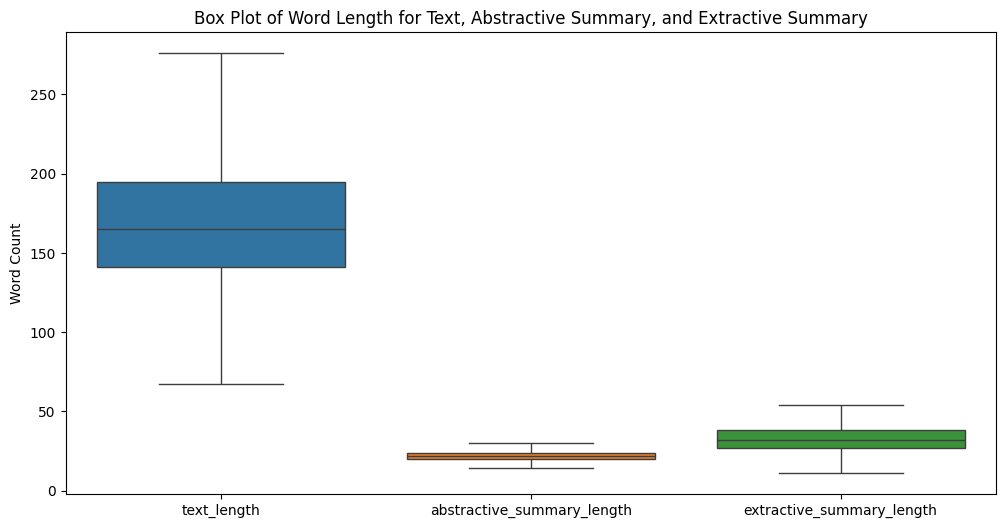

In [53]:
plt.figure(figsize=(12, 6))
dev_df['text_length'] = dev_df['text'].apply(lambda x: len(str(x).split()))
dev_df['abstractive_summary_length'] = dev_df['abstractive_summary'].apply(lambda x: len(str(x).split()))
dev_df['extractive_summary_length'] = dev_df['extractive_summary'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=dev_df[['text_length', 'abstractive_summary_length', 'extractive_summary_length']])
plt.title('Box Plot of Word Length for Text, Abstractive Summary, and Extractive Summary')
plt.ylabel('Word Count')
plt.show()

## test_df

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for each column
Q1_text = test_df['text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_text = test_df['text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_text = Q3_text - Q1_text
lower_bound_text = Q1_text - 1.5 * IQR_text
upper_bound_text = Q3_text + 1.5 * IQR_text

Q1_summary = test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_summary = test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_summary = Q3_summary - Q1_summary
lower_bound_summary = Q1_summary - 1.5 * IQR_summary
upper_bound_summary = Q3_summary + 1.5 * IQR_summary


Q1_e_summary = test_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_e_summary = test_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_e_summary = Q3_e_summary - Q1_e_summary
lower_bound_e_summary = Q1_e_summary - 1.5 * IQR_e_summary
upper_bound_e_summary = Q3_e_summary + 1.5 * IQR_e_summary


# Find rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
outliers = test_df[
    ~(test_df['text'].apply(lambda x: len(str(x).split())).between(lower_bound_text, upper_bound_text) &
      test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_summary, upper_bound_summary) &
      test_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_e_summary, upper_bound_e_summary))
]

print("Outliers in test_df:")
print(outliers)

Outliers in test_df:
Empty DataFrame
Columns: [id, url, text, abstractive_summary, extractive_summary, text_length, abstractive_summary_length, extractive_summary_length]
Index: []


In [65]:
# Remove rows with outliers
test_df_1 = test_df[
    test_df['text'].apply(lambda x: len(str(x).split())).between(lower_bound_text, upper_bound_text) &
    test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_summary, upper_bound_summary) &
    test_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_e_summary, upper_bound_e_summary)
]

print("Original DataFrame shape:", test_df.shape)
print("DataFrame shape after removing outliers:", test_df_1.shape)

# Update train_df with the DataFrame without outliers
test_df = test_df_1


Original DataFrame shape: (9795, 8)
DataFrame shape after removing outliers: (9775, 8)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

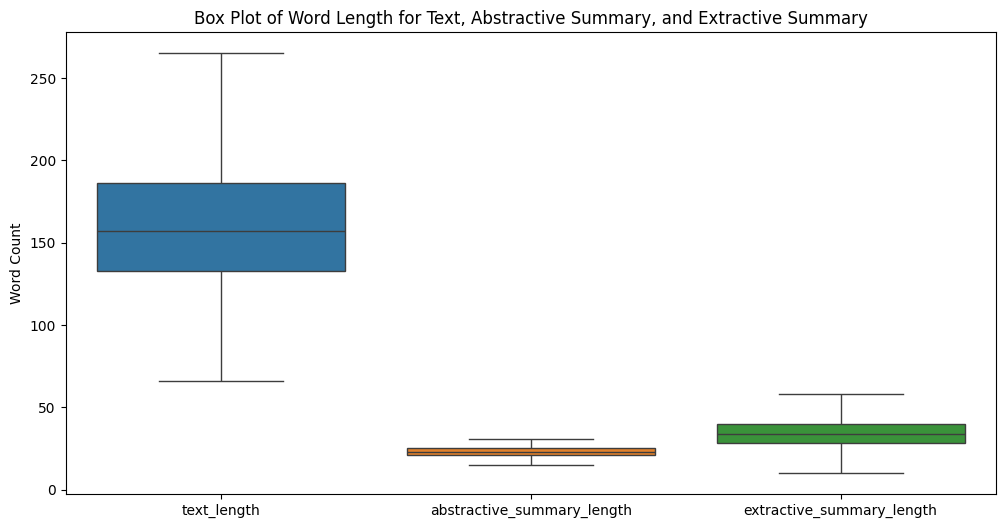

In [69]:
plt.figure(figsize=(12, 6))
test_df['text_length'] = test_df['text'].apply(lambda x: len(str(x).split()))
test_df['abstractive_summary_length'] = test_df['abstractive_summary'].apply(lambda x: len(str(x).split()))
test_df['extractive_summary_length'] = test_df['extractive_summary'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=test_df[['text_length', 'abstractive_summary_length', 'extractive_summary_length']])
plt.title('Box Plot of Word Length for Text, Abstractive Summary, and Extractive Summary')
plt.ylabel('Word Count')
plt.show()

## download data

In [74]:
test_df.iloc[1]

,1
id,22708
url,https://www.liputan6.com/news/read/22708/kereta-api-jalur-selatan-mengalami-keterlambatan
text,liputan6 com yogyakarta datang kereta api dari jalur selatan senin 29 10 pasti lambat tiba di stasiun bandung jawa barat hal itu jadi susul amblas lintas kereta di kroya jawa tengah kamis silam baca lintas ka antara kroya dan bandung ambles rangkai kereta api yang pasti lambat adalah taksaka argowilis lodaya mutiara selatan turangga cisadane dan kahuripan demikian ungkap orang tugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta tugas itu jelas kereta yang jalan di atas lintas kroya mesti ekstra hati hati karena tengah baik tugas apalagi hujan lebat yang terus guyur wilayah cilacap juga ikut parah kondisi lintas karena itu daops vi laku sistem susul guna antisipasi jadi tumpang tindih jadwal berangkat jelas kereta yang jadwal tepat waktu berangkat lebih dahulu banding kereta yang telanjur molor dasar pantau sctv terap sistem sebut akibat ribu tumpang tumpuk di stasiun tugu dan lempuyangan yogyakarta sementara jadwal ka jalur selatan pada akhir pekan ini bilang padat soal tepat dengan puncak arus balik ajar habis libur semester ken wiwik susilo
abstractive_summary,berangkat kereta api dari jalur selatan kembali alam lambat lintas di kroya jawa tengah masih baik tugas pt kereta api indonesia
extractive_summary,demikian ungkap orang tugas pt kereta api indonesia daerah operasi vi di stasiun tugu yogyakarta tugas itu jelas kereta yang jalan di atas lintas kroya mesti ekstra hati hati karena tengah baik tugas


In [72]:
# prompt: drop the column text_length, abstractive_summary_length	, extractive_summary_length in dev_df and test_df

dev_df = dev_df.drop(['text_length', 'abstractive_summary_length', 'extractive_summary_length'], axis=1)
test_df = test_df.drop(['text_length', 'abstractive_summary_length', 'extractive_summary_length'], axis=1)


In [75]:
# download the dev_df and rest_df into csv format into my local folder

from google.colab import files

dev_df.to_csv('dev_df.csv', encoding='utf-8', index=False)
files.download('dev_df.csv')

test_df.to_csv('test_df.csv', encoding='utf-8', index=False)
files.download('test_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>